## PRÁCTICA 2 - Estadística Descriptiva Bivariante. Correlación y regresión lineal simple.

Objetivos:

Manejo básico de estadística en Python:
    
- Análisis descriptivo de una y dos variables
    
- Búsqueda de relación entre variables
    
- Realización de análisis estadísticos y generación de informes

En esta práctica vamos a aprender a relacionar dos variables y analizar la regresión lineal simple entre dos variables. Para ello se va a utilizar el dataset `mpg`, utilizado en la Práctica 1 de estadística descriptiva básica. En esta práctica se va a aplicar la librería de Python `scipy` y sus módulos de correlación y regresión lineal.

In [28]:
#Importamos las librerías que vamos a utilizar

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

#### 1. Regresión lineal simple y correlación de dos variables (presión y precipitación, peso y altura, potencia y aceleración). 

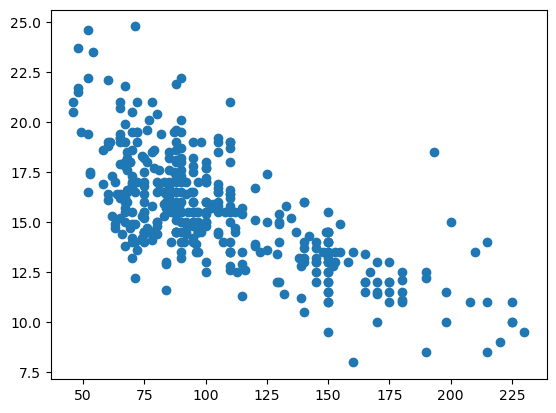

In [29]:
#1a. Generar la matriz de dispersión

mpg = sns.load_dataset('mpg')

#Quitad los NaN que hay en el dataset
mpg.dropna(inplace=True)

plt.scatter(mpg.horsepower, mpg.acceleration)



In [30]:
#1b. Regresión lineal simple.

# División de los datos en train y test

X = mpg.horsepower
y = mpg.acceleration

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.95,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo

modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())





                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     334.7
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           1.04e-53
Time:                        11:44:49   Log-Likelihood:                -781.24
No. Observations:                 372   AIC:                             1566.
Df Residuals:                     370   BIC:                             1574.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6275      0.297     69.407      0.0

In [31]:
#1c. Correlación entre dos variables

# Correlación lineal entre las dos variables

corr_test = pearsonr(x = mpg.horsepower, y =  mpg.acceleration)
print("Coeficiente de correlación de Pearson: ", corr_test[0])



Coeficiente de correlación de Pearson:  -0.6891955103342368


In [32]:
#1d. Calculamos el intervalo de confianza para los coeficientes del modelo 

# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[20.04309192, 21.21189435],
       [-0.05391776, -0.04345166]])

In [33]:
#1e. Calculamos las predicciones con intervalo de confianza al 95% de nuestro modelo previamente calculado

# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,17.462987,0.147539,17.172867,17.753107,13.555778,21.370196
1,17.316933,0.141918,17.037866,17.595999,13.410529,21.223337
2,15.515598,0.102738,15.313575,15.717621,11.613941,19.417255
3,15.612968,0.102847,15.410731,15.815205,11.711300,19.514636


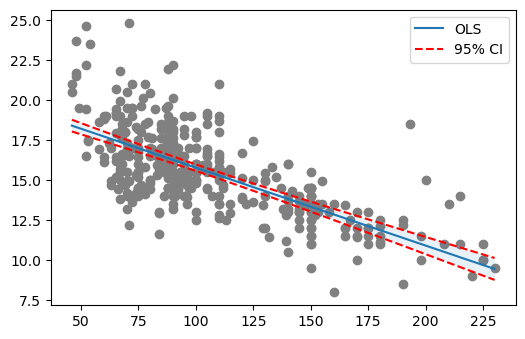

In [34]:
#1f. Ploteamos nuestro modelo con su linea de regresión


# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

#### 2. El dataset `mpg` tiene varias variables sobre las características de un conjunto de coches:

1. Haz un gráfico de dispersión con potencia y aceleración. ¿Es razonable predecir la potencia de un coche de esta muestra en función de su aceleración, o viceversa? Justifica tu respuesta. 
2. Utilizando la recta de regresión adecuada, ¿qué potencia se prevé para un coche que tenga una aceleración de 10 segundos?
3. Utilizando la recta de regresión adecuada, ¿qué aceleración se prevé para un coche que tenga una potencia de 10 Cv?
4. Un coche que tenga una aceleración de 17 segundos y una potencia de 130 Cv, ¿qué aceleración tendría un coche con una potencia de 300 Cv?
5. Distingamos ahora los coches con cuatro y ocho cilindros. ¿Qué potencia se prevé para un coche con cuatro cilindros? ¿Y para un coche de ocho cilindros? ¿Hay diferencia en la aceleración entre estos dos tipos de cilindros?
6. Analiza los residuos de los modelos anteriores
7. Identificar y eliminar los puntos extraños (outliers) en el modelo del apartado b, comprobando su efecto en el análisis estadístico. Guardar los datos en un fichero aparte. 
8. Repetir los apartados 2), 3), 4), 5) y 6) con el nuevo modelo simplificado, comparando los resultados con el modelo completo.
9. Realizar un estudio similar, a partir del modelo completo, para hallar una posible relación entre aceleración y peso. 
10. Repetir el apartado 9) con las variables desplazamiento y potencia. 

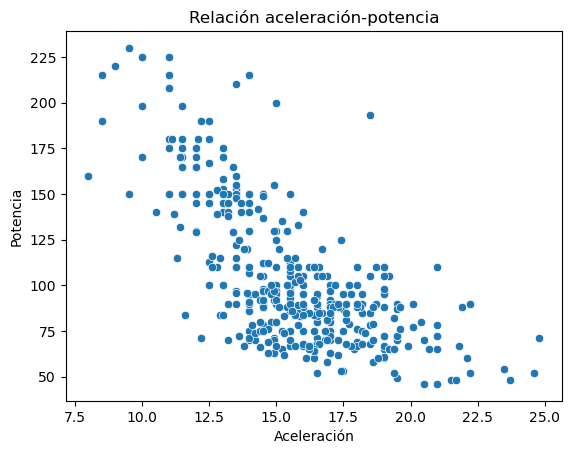

Coeficiente de correlación de pearson: -0.6892

El coeficiente de correlación de pearson es alto, por tanto si que se podría predecir con cierta precisión el valor de una de las variables con la otra


In [64]:
#1.- Gráfico de dispersión con potencia y aceleración
sns.scatterplot(data=mpg, x='acceleration', y='horsepower')
plt.title("Relación aceleración-potencia")
plt.xlabel("Aceleración")
plt.ylabel("Potencia")
plt.show()

#Para ver si se puede predecir una con la otra estudiamos 
#el valor del coeficiente de correlación de Pearson
corr, pval = pearsonr(mpg['acceleration'], mpg['horsepower'])
print(f"Coeficiente de correlación de pearson: {corr:.4f}")
print("\nEl coeficiente de correlación de pearson es alto, por tanto si que se podría predecir con cierta precisión el valor de una de las variables con la otra")


In [53]:
#2.- Utilizando la recta de regresión adecuada, ¿qué potencia se prevé 
# para un coche que tenga una aceleración de 10 segundos?
X = mpg[['acceleration']]
Y = mpg['horsepower']

model = LinearRegression()
model.fit(X, Y)

print(f"Coeficiente: {model.coef_[0]}, Intercepto: {model.intercept_}")

input_df = pd.DataFrame({'acceleration': [10]})
pred_10s = model.predict(input_df)[0]
print(f"Potencia estimada para aceleración una aceleración en 10s: {pred_10s:.0f}cv")


Coeficiente: -9.61552779231094, Intercepto: 253.90744493958346
Potencia estimada para aceleración una aceleración en 10s: 158cv


In [61]:
#3.-Utilizando la recta de regresión adecuada, ¿qué aceleración 
#se prevé para un coche que tenga una potencia de 10 Cv?
X2 = mpg[['horsepower']]
Y2 = mpg[['acceleration']]

model2 = LinearRegression()
model2.fit(X2, Y2)

input_df = pd.DataFrame([[10]], columns=['horsepower'])
pred_10cv = model2.predict(input_df)[0]
print(f"Aceleración estimada para aceleración de un coche de 10cv: {pred_10cv[0]:.2f}s")


Aceleración estimada para aceleración de un coche de 10cv: 20.21s


In [63]:
#4.- Aceleración estimada para un coche de 300cv
input_df = pd.DataFrame([[300]], columns=['horsepower'])
pred_300cv = model2.predict(input_df)[0]
print(f"La aceleración que se predice para un coche de 300cv es: {pred_300cv[0]:.2f}s")

La aceleración que se predice para un coche de 300cv es: 5.88s


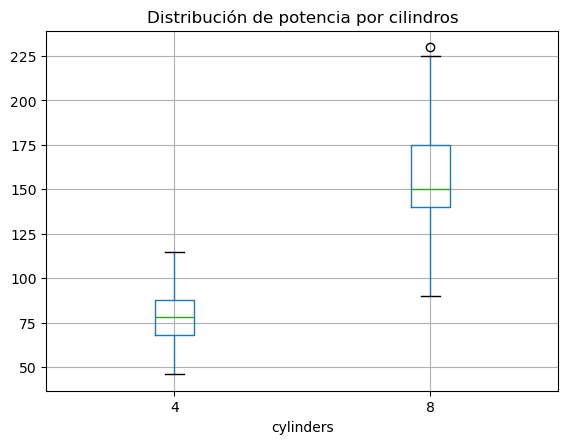

Potencia prevista para un coche con 4 cilindros: 99.250000cv
Potencia prevista para un coche con 4 cilindros: 158.300971cv


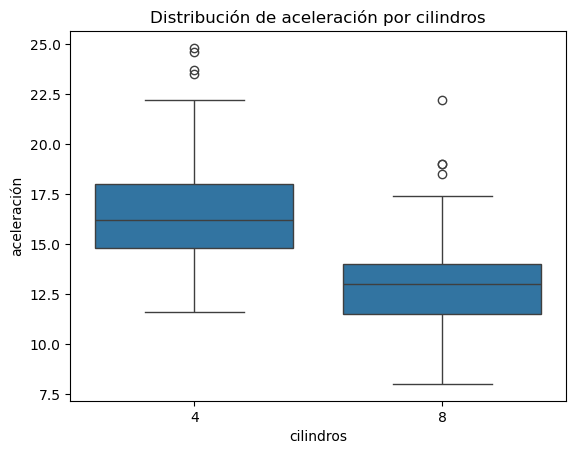

In [82]:
#5.-Distingamos ahora los coches con cuatro y ocho cilindros. ¿Qué 
#potencia se prevé para un coche con cuatro cilindros? ¿Y para un coche 
#de ocho cilindros? ¿Hay diferencia en la aceleración entre estos dos 
#tipos de cilindros?
mpg_filtrado = mpg[mpg['cylinders'].isin([4,8])]
mpg_filtrado.boxplot(column='horsepower', by='cylinders')
plt.suptitle('')
plt.title('Distribución de potencia por cilindros')
plt.show()

model_cyl = smf.ols('horsepower ~ C(cylinders)', data=mpg).fit()
intercept = model_cyl.params['Intercept']
coef_8_cyl = model_cyl.params['C(cylinders)[T.8]']

potencia_4_cyl = intercept
potencia_8_cyl = intercept + coef_8_cyl

print(f'Potencia prevista para un coche con 4 cilindros: {potencia_4_cyl:0f}cv')
print(f'Potencia prevista para un coche con 4 cilindros: {potencia_8_cyl:0f}cv')

sns.boxplot(data=mpg[mpg['cylinders'].isin([4,8])], x='cylinders', y='acceleration')
plt.title('Distribución de aceleración por cilindros')
plt.xlabel('cilindros')
plt.ylabel('aceleración')
plt.show()

#### Realizar un informe con los análisis realizados de cada uno de los apartados anteriores y exportarlo en un fichero .PDF

- El informe se realizará en un grupos de dos personas analizando los resultados obtenidos en cada uno de los apartados anteriores. Todas las gráficas deberán estar bien maquetadas: título, titulo en los ejes, ejes con un intervalo lógico y leyenda (si es el caso). El código empleado también se deberá incluir. 

- En el Moodle se encuentra un trabajo tipo para que tengáis de referencia. El archivo incluirá los nombres de todos autores en el siguiente formato:

- Nombre del archivo: Practica2_ApellidosNombre1_ApellidosNombre2.pdf (extensión obligatoria en .pdf)

- Se avisará en Moodle la fecha límite de entrega de este informe.